Reference: https://365datascience.com/calculators/hypothesis-test-calculator/

In [27]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [87]:
# data source: https://www.kaggle.com/datasets/abrambeyer/openintro-possum?select=possum.csv
data = pd.read_csv('./data/possum.csv')
data['hdlngth'].describe()

count    104.000000
mean      92.602885
std        3.573349
min       82.500000
25%       90.675000
50%       92.800000
75%       94.725000
max      103.100000
Name: hdlngth, dtype: float64

In [67]:
sample_mean = data['hdlngth'].mean()
sample_std = data['hdlngth'].std()
n = len(data)

In [120]:
sample_mean

92.60288461538462

$$ CI =  \bar{x} \pm z \frac{s} {\sqrt{n}} $$

<div style="text-align: center"><a href = 'https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf' allign = 'center'>Reference </a></div>

In [83]:
upper = sample_mean + 1.96 * sample_std / np.sqrt(n)
lower = sample_mean - 1.96 * sample_std / np.sqrt(n)

print(f'Lower bound: {lower}')
print(f'Upper bound: {upper}')

Lower bound: 91.91610895449088
Upper bound: 93.28966027627837


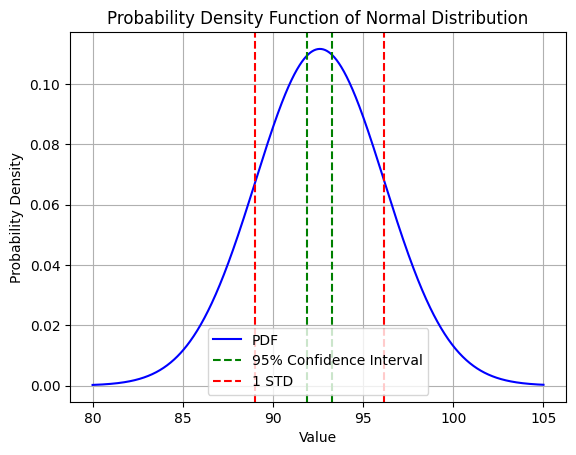

In [84]:
# Generate a range of x values
x = np.linspace(80, 105, 1000)

# Calculate the probability density function (PDF) for each x value
pdf = norm.pdf(x, sample_mean, sample_std)

# Plot the PDF
plt.plot(x, pdf, label='PDF', color='b')
plt.axvline(upper, color="green", linestyle="--", label = '95% Confidence Interval')
plt.axvline(lower, color="green", linestyle="--")

# one STD
plt.axvline(sample_mean -  sample_std, color="r", linestyle="--", label = '1 STD')
plt.axvline(sample_mean +  sample_std, color="r", linestyle="--")

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

Hypothesis Testing:

A researcher claims, $\mu_{o}$ , is that the true mean for possum head length at 100 mm:

$$ \mu_{o} = 100 mm $$
$$ \mu_{a} \neq 100 mm $$

The formula for test statistic is:

$$
t = \frac{ \bar{x} - \mu_{0}}{(\frac{s}{\sqrt{n}})}
$$ 

In [133]:
df = n-1
u_o = 100 # null mean

# https://statisticsbyjim.com/hypothesis-testing/t-distribution-table/
alpha  = 0.05
cv_t = stats.t.ppf(alpha/2,df) 
print ("Critical value from t-table:",round(cv_t,3))

Critical value from t-table: -1.983


In [134]:
# https://www.cuemath.com/data/hypothesis-testing/
t_statistic = (sample_mean- u_o)/ (sample_std/np.sqrt(n))
print(f'test statistic is: {t_statistic:.4f}')
print(f'Because {t_statistic:.0f} is < {cv_t:.02f}, we can reject the null hypothesis in favor of the alternative.')

test statistic is: -21.1107
Because -21 is < -1.98, we can reject the null hypothesis in favor of the alternative.


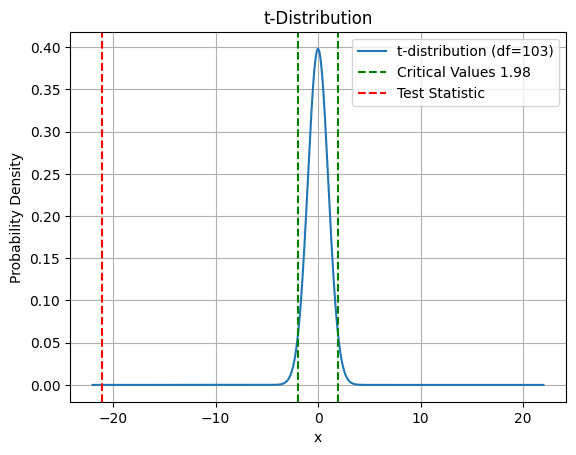

In [140]:
# Generate x values
x = np.linspace(-22, 22, 1000)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, df)

# Plot the PDF
plt.plot(x, pdf, label=f"t-distribution (df={df})")
plt.title("t-Distribution")

plt.axvline(cv_t , color="green", linestyle="--", label = f'Critical Values {-cv_t:0.2f}')
plt.axvline(-cv_t , color="green", linestyle="--")
plt.axvline(t_statistic , color="red", linestyle="--", label = 'Test Statistic')
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
print(f"The probability of getting less than {t_statistic:.2f} is {stats.t.cdf(t_statistic, df)}")

The probability of getting less than -21.11 is 1.677116587339625e-39
